In [1]:
from collections import namedtuple, defaultdict
import csv

Key = namedtuple('Key', ['system', 'small', 'colocated'])
OWNERSHIP = "ownership"
CENTRALIZED = "centralized"
LEASES = "leases"
BY_VALUE = "by_value"

results = defaultdict(list)

with open('scalability.csv', 'r') as f:
    r = csv.DictReader(f)
    for line in r:
        key = Key(system=line['system'], small=line['small'] == 'true', colocated=line['colocated'] == 'true')
        num_nodes = int(line['num_nodes'])
        throughput = float(line['throughput'])
        print(key, num_nodes, throughput)
        results[key].append((num_nodes, throughput))

Key(system='ownership', small=True, colocated=True) 20 49541.2
Key(system='ownership', small=True, colocated=True) 40 90602.1
Key(system='ownership', small=True, colocated=True) 60 118388.8
Key(system='ownership', small=True, colocated=True) 80 132894.0
Key(system='ownership', small=True, colocated=True) 100 144178.72
Key(system='leases', small=True, colocated=True) 20 5085.52
Key(system='leases', small=True, colocated=True) 40 5071.39
Key(system='leases', small=True, colocated=True) 60 5093.3
Key(system='leases', small=True, colocated=True) 80 5140.56
Key(system='leases', small=True, colocated=True) 100 5080.43
Key(system='centralized', small=True, colocated=True) 20 4570.57
Key(system='centralized', small=True, colocated=True) 40 4601.23
Key(system='centralized', small=True, colocated=True) 60 4402.84
Key(system='centralized', small=True, colocated=True) 80 4520.81
Key(system='centralized', small=True, colocated=True) 100 4491.72
Key(system='ownership', small=True, colocated=False) 2

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

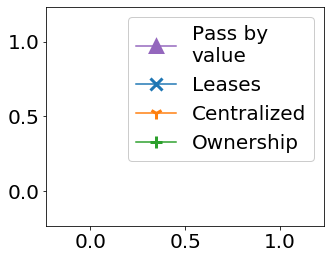

In [3]:
import matplotlib.pyplot as plt


SAVE = True
font = {'size': 20}
plt.rc('font', **font)

COLORS = ['tab:purple', 'tab:blue', 'tab:orange', 'tab:green']
MARKERS = ['^', 'x', '1', '+']
LABELS = {
    OWNERSHIP: "Ownership",
    CENTRALIZED: "Centralized",
    LEASES: "Leases",
    BY_VALUE: "Pass by\nvalue",
}
marker_style = dict(markersize=12, mew=3)

for small in [True, False]:
    for colocated in [True, False]:
        plt.figure(figsize=(5, 3))
        i = 0
        for system in [BY_VALUE, LEASES, CENTRALIZED, OWNERSHIP]:
            key = Key(system, small, colocated)
            if key in results:
                points = results[key]
                x, y = zip(*points)
                plt.yticks([0, 50000, 100000, 150000], ["0", "50k", "100k", "150k"])
                plt.plot(x, y, label=LABELS[system], linewidth=2, marker=MARKERS[i], color=COLORS[i], **marker_style)
                plt.ylim(0, 170000)
                plt.xticks(range(20, 101, 20))

            i += 1
        plt.xlabel("Worker nodes")
        plt.ylabel("Throughput\n(tasks/s)")
        plt.grid(axis='y')
        plt.tight_layout()
        if SAVE:
            plt.savefig('scalability-{}-{}.pdf'.format("small" if small else "large", "colocated" if colocated else "spread"))
            plt.clf()
        else:
            plt.show()
if SAVE:
    plt.figure(figsize=(5, 4))
    for i, system in enumerate([BY_VALUE, LEASES, CENTRALIZED, OWNERSHIP]):
        plt.plot([], [], label=LABELS[system], marker=MARKERS[i], color=COLORS[i], **marker_style)
    plt.legend(framealpha=1)
    plt.tight_layout()
    plt.savefig("scalability-legend.pdf")